<a href="https://colab.research.google.com/github/PermanAtayev/Movie_revenue_prediction/blob/master/movie_revenue_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import ast
import lightgbm as lgb
import xgboost as xgb

import requests
from io import BytesIO

!pip install Pillow
from PIL import Image

!pip install eli5
import eli5


!pip install catboost
import catboost

import urllib

from wordcloud import WordCloud
from collections import Counter
from sklearn import feature_extraction
from sklearn import preprocessing
from datetime import datetime
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
from sklearn.preprocessing import LabelEncoder
from keras import regularizers
from keras.metrics import mean_squared_logarithmic_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 112kB 8.4MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


     |████████████████████████████████| 64.8MB 63kB/s 


#### Perman's Files

Create your own section for loading the dataset from your drive and run that.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

root = '/content/drive/My Drive/Course/3rd year/2nd semester/CS464/Project/dataset'
train_path = os.path.join(root, 'train.csv.zip')
test_path = os.path.join(root, 'test.csv.zip')


!unzip '/content/drive/My Drive/Course/3rd year/2nd semester/CS464/Project/dataset/train.csv.zip' -d '/content'
!unzip '/content/drive/My Drive/Course/3rd year/2nd semester/CS464/Project/dataset/test.csv.zip' -d '/content'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Archive:  /content/drive/My Drive/Course/3rd year/2nd semester/CS464/Project/dataset/train.csv.zip
  inflating: /content/train.csv      
Archive:  /content/drive/My Drive/Course/3rd year/2nd semester/CS464/Project/dataset/test.csv.zip
  inflating: /content/test.csv       


#### Abdul Hamid's Files

Create your own section for loading the dataset from your drive and run that.

In [0]:
from google.colab import drive
drive.mount('/gdrive')

root = '/gdrive/My Drive/Bilkent/Year 3'
train_path = os.path.join(root, 'train.csv.zip')
test_path = os.path.join(root, 'test.csv.zip')

!unzip '/gdrive/My Drive/Bilkent/Year 3/train.csv.zip' -d '/content'
!unzip '/gdrive/My Drive/Bilkent/Year 3/test.csv.zip' -d '/content'


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Archive:  /gdrive/My Drive/Bilkent/Year 3/train.csv.zip
replace /content/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  /gdrive/My Drive/Bilkent/Year 3/test.csv.zip
replace /content/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Data

In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

print(test.shape)
print(train.shape)

(4398, 22)
(3000, 23)


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

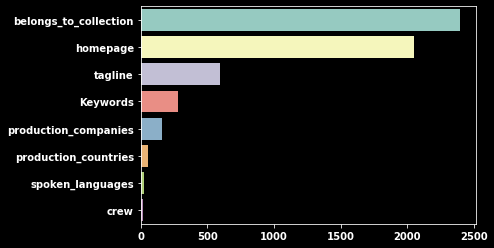

In [0]:
missing=train.isna().sum().sort_values(ascending=False)
sns.barplot(missing[:8],missing[:8].index)
plt.style.use('dark_background')
plt.show()

In [0]:
# vectorizer = feature_extraction.text.TfidfVectorizer(
#             sublinear_tf=True,
#             analyzer='word',
#             token_pattern=r'\w{1,}',
#             ngram_range=(1, 2),
#             min_df=5)

# train['log_revenue'] = np.log(train['revenue'])

# overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
# linreg = LinearRegression()
# linreg.fit(overview_text, train['log_revenue'])
# eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

In [0]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew',]

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
dfx = text_to_dict(train)
for col in dict_columns:
       train[col]=dfx[col]

In [0]:
train['belongs_to_collection'].apply(lambda x:len(x) if x!= {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

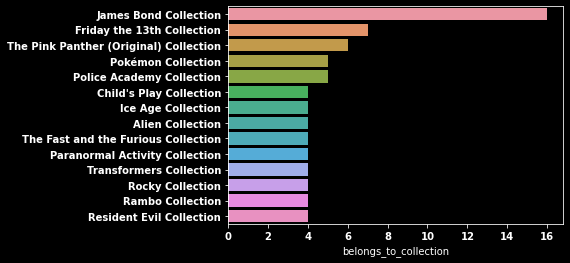

In [0]:
collections=train['belongs_to_collection'].apply(lambda x : x[0]['name'] if x!= {} else '?').value_counts()[1:15]
sns.barplot(collections,collections.index)
plt.show()

In [0]:
# train['collection_name'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
# train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

# train = train.drop(['belongs_to_collection'], axis=1)

In [0]:
train['tagline'].apply(lambda x:1 if x is not np.nan else 0).value_counts()

1    2403
0     597
Name: tagline, dtype: int64

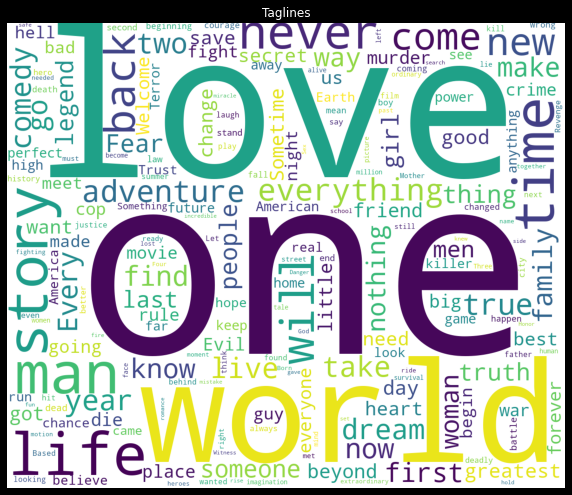

In [0]:
plt.figure(figsize=(10,10))
taglines=' '.join(train['tagline'].apply(lambda x:x if x is not np.nan else ''))

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(taglines)
plt.imshow(wordcloud)
plt.title('Taglines')
plt.axis("off")
plt.show()

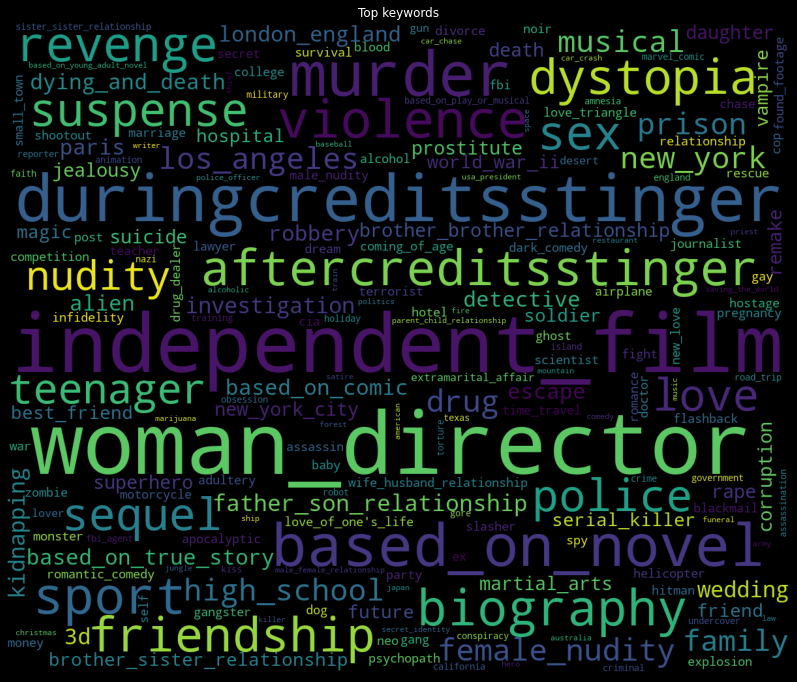

In [0]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (16, 12))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top keywords')
plt.axis("off")
plt.show()

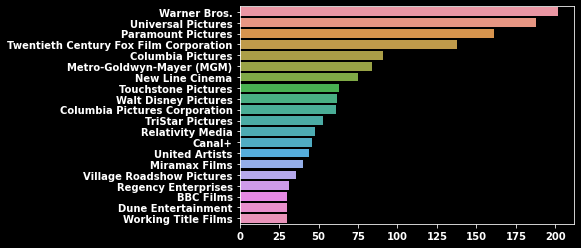

In [0]:
x=train['production_companies'].apply(lambda x : [x[i]['name'] for i in range(len(x))] if x != {} else []).values
count=Counter([i for j in x for i in j]).most_common(20)
sns.barplot([val[1] for val in count],[val[0] for val in count])

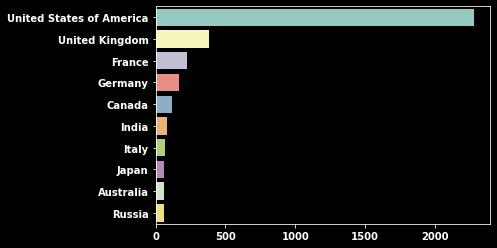

In [0]:
countries=train['production_countries'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values
count=Counter([j for i in countries for j in i]).most_common(10)
sns.barplot([val[1] for val in count],[val[0] for val in count])

In [0]:
train['spoken_languages'].apply(lambda x:len(x) if x !={} else 0).value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

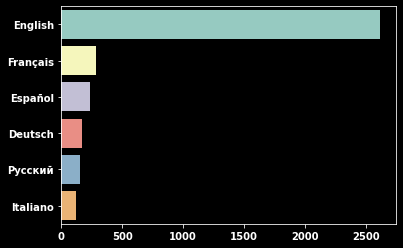

In [0]:
lang=train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
count=Counter([i for j in lang for i in j]).most_common(6)
sns.barplot([val[1] for val in count],[val[0] for val in count])

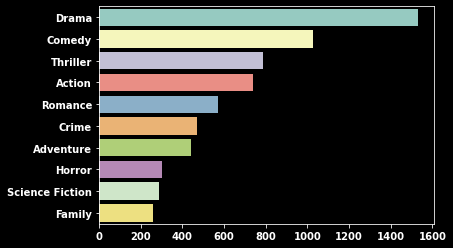

In [0]:
genre=train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
count=Counter([i for j in genre for i in j]).most_common(10)
sns.barplot([val[1] for val in count],[val[0] for val in count])

In [0]:
dfx = text_to_dict(test)
for col in dict_columns:
  test[col]=dfx[col]

In [0]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.title('skewed data')
# sns.distplot(train['revenue'])
# plt.subplot(1,2,2)
# plt.title('log transformation')
# sns.distplot(np.log(train['revenue']))
# plt.show()

In [0]:
train['log_revenue']=np.log1p(train['revenue'])

In [0]:
# plt.subplots(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.hist(train['revenue'],bins=10,color='g')
# plt.title('skewed data')
# plt.subplot(1,2,2)
# plt.hist(np.log(train['revenue']),bins=10,color='g')
# plt.title('log transformation')
# plt.show()

In [0]:
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [0]:
# plt.subplots(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.hist(train['budget']+1,bins=10,color='g')
# plt.title('skewed data')
# plt.subplot(1,2,2)
# plt.hist(np.log(train['budget']+1),bins=10,color='g')
# plt.title('log transformation')
# plt.show()

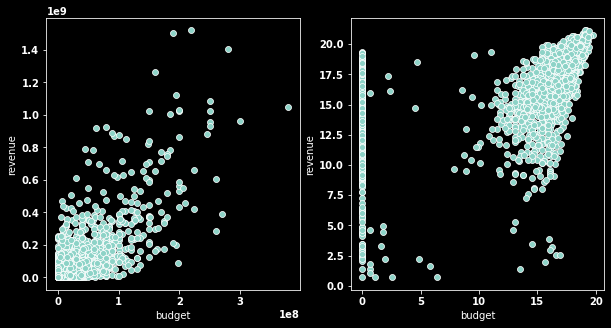

In [0]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(train['budget'],train['revenue'])
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(train['budget']),np.log1p(train['revenue']))
plt.show()

In [0]:
train['log_budget']=np.log1p(train['budget'])

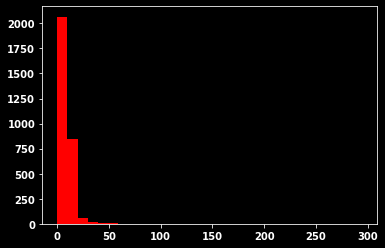

In [0]:
plt.hist(train['popularity'],bins=30,color='red')
plt.show()

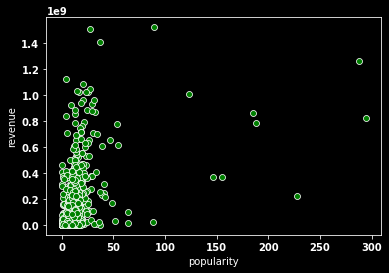

In [0]:
sns.scatterplot(train['popularity'],train['revenue'],color='green')
plt.show()

## Splitting date, into day, month and year

Text(0, 0.5, 'No of releases')

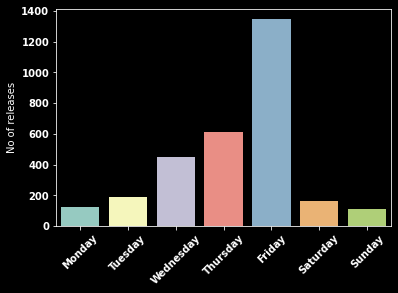

In [0]:
def date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year

train['release_date']=train['release_date'].fillna('1/1/90').apply(lambda x: date(x))
test['release_date']=test['release_date'].fillna('1/1/90').apply(lambda x: date(x))

train['release_date']=train['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
test['release_date']=test['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

train['release_day']=train['release_date'].apply(lambda x:x.weekday())
train['release_month']=train['release_date'].apply(lambda x:x.month)
train['release_year']=train['release_date'].apply(lambda x:x.year)

test['release_day']=test['release_date'].apply(lambda x:x.weekday())
test['release_month']=test['release_date'].apply(lambda x:x.month)
test['release_year']=test['release_date'].apply(lambda x:x.year)

day=train['release_day'].value_counts().sort_index()
sns.barplot(day.index,day)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation='45')
plt.ylabel('No of releases')

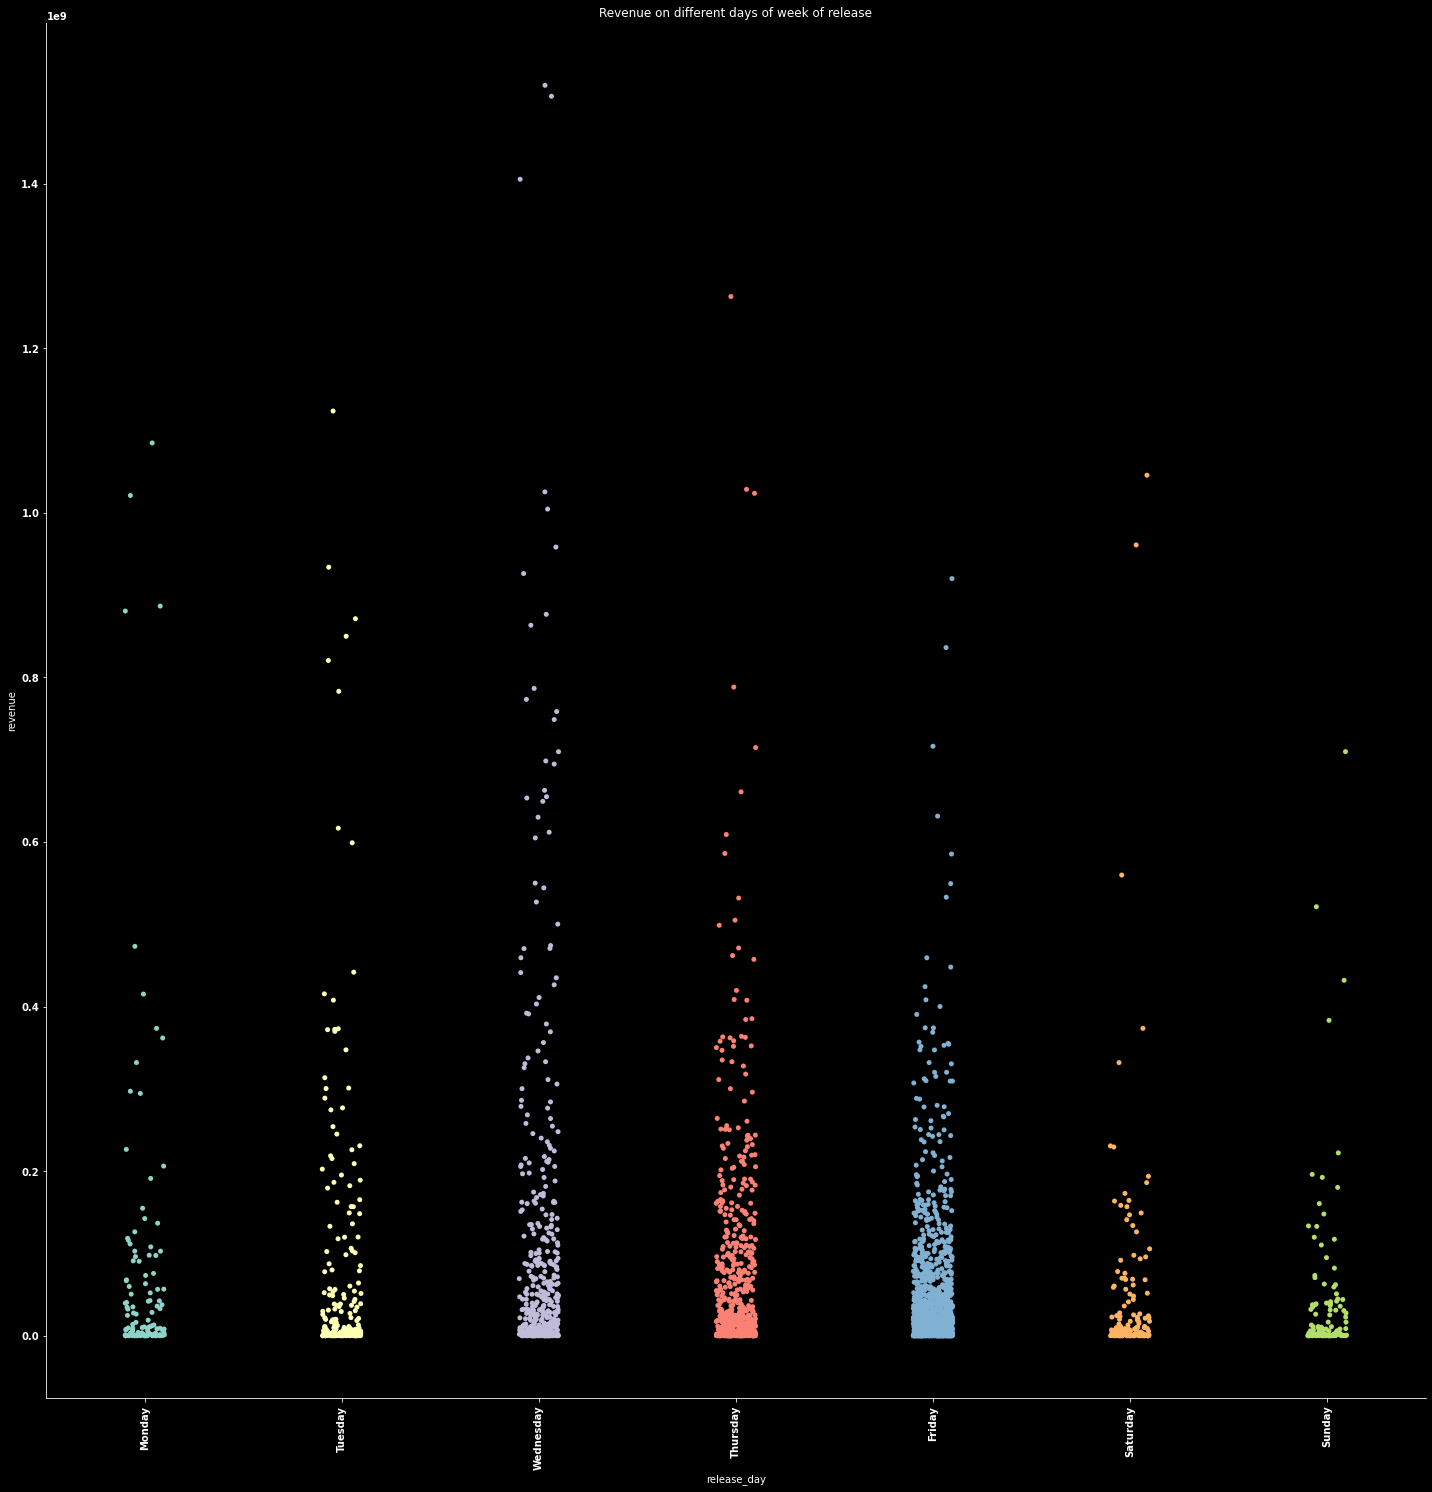

In [0]:
sns.catplot(x='release_day',y='revenue',data=train, height=20, aspect=1)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation='90')
plt.title('Revenue on different days of week of release');
plt.show()

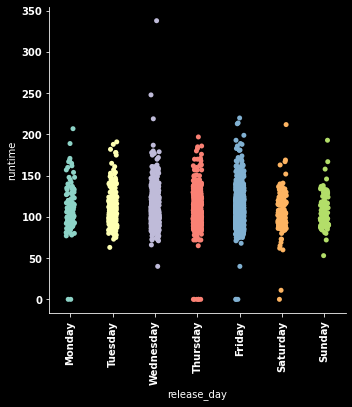

In [0]:
sns.catplot(x='release_day',y='runtime',data=train)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation='90')
plt.show()

<Figure size 720x1080 with 0 Axes>

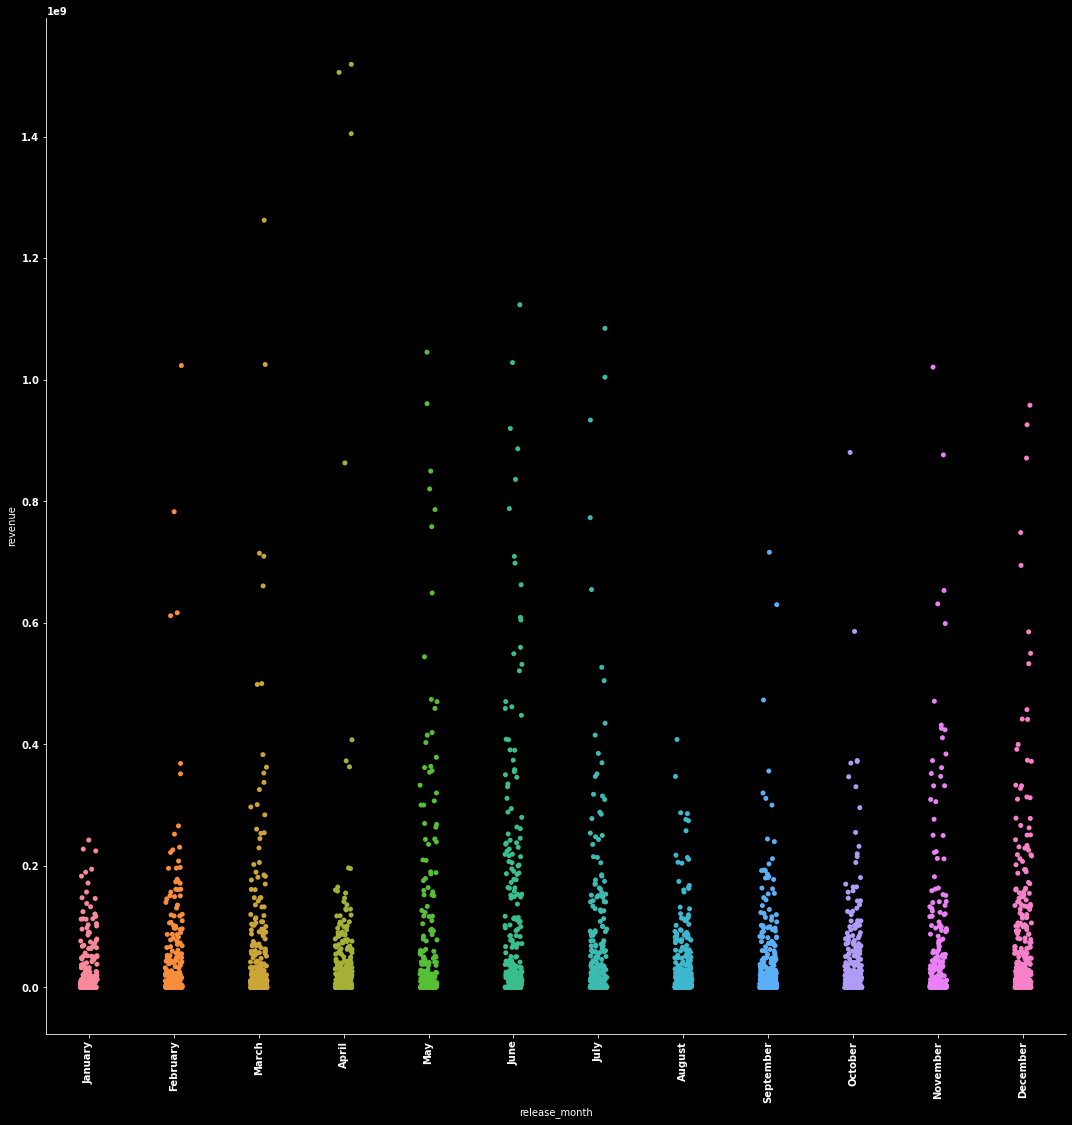

In [0]:
plt.figure(figsize=(10,15))
sns.catplot(x='release_month',y='revenue',data=train, height=15, aspect=1)
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
plt.gca().set_xticklabels(month_lst,rotation='90')
plt.show()

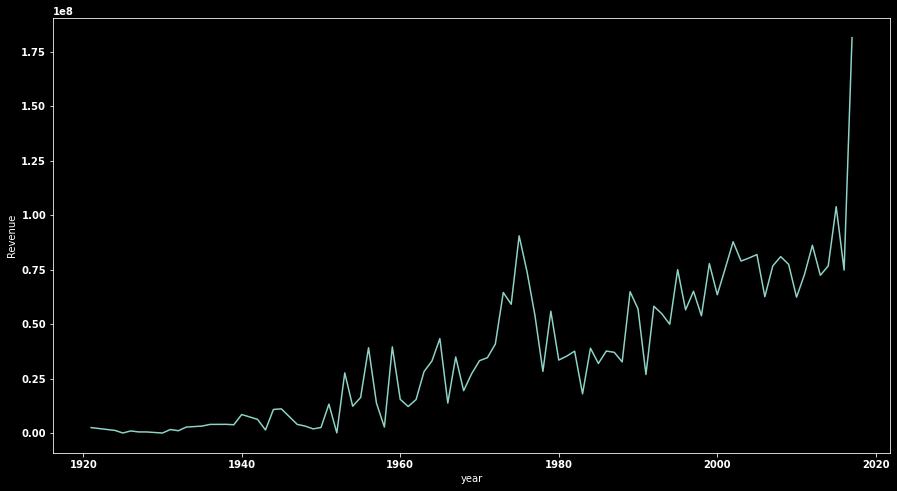

In [0]:
plt.figure(figsize=(15,8))
yearly=train.groupby(train['release_year'])['revenue'].agg('mean')
plt.plot(yearly.index,yearly)
plt.xlabel('year')
plt.ylabel("Revenue")
plt.savefig('fig')

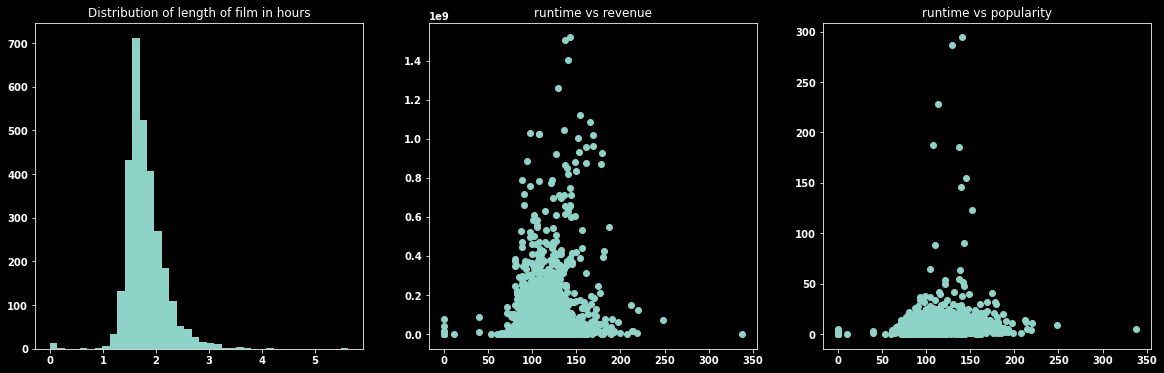

In [0]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(train['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(train['runtime'].fillna(0), train['revenue'])
plt.title('runtime vs revenue');
plt.subplot(1, 3, 3)
plt.scatter(train['runtime'].fillna(0), train['popularity'])
plt.title('runtime vs popularity');

In [0]:
train['homepage'].value_counts().sort_values(ascending=False)[:5]

http://www.transformersmovie.com/                 4
http://www.lordoftherings.net/                    2
http://www.thehobbit.com/                         2
http://www.percyjacksonthemovie.com/us/#!/home    1
http://loveandfriendshipmovie.com/                1
Name: homepage, dtype: int64

In [0]:
genres=train.loc[train['genres'].str.len()==1][['genres','revenue','budget','popularity','runtime']].reset_index(drop=True)
genres['genres']=genres.genres.apply(lambda x :x[0]['name'])

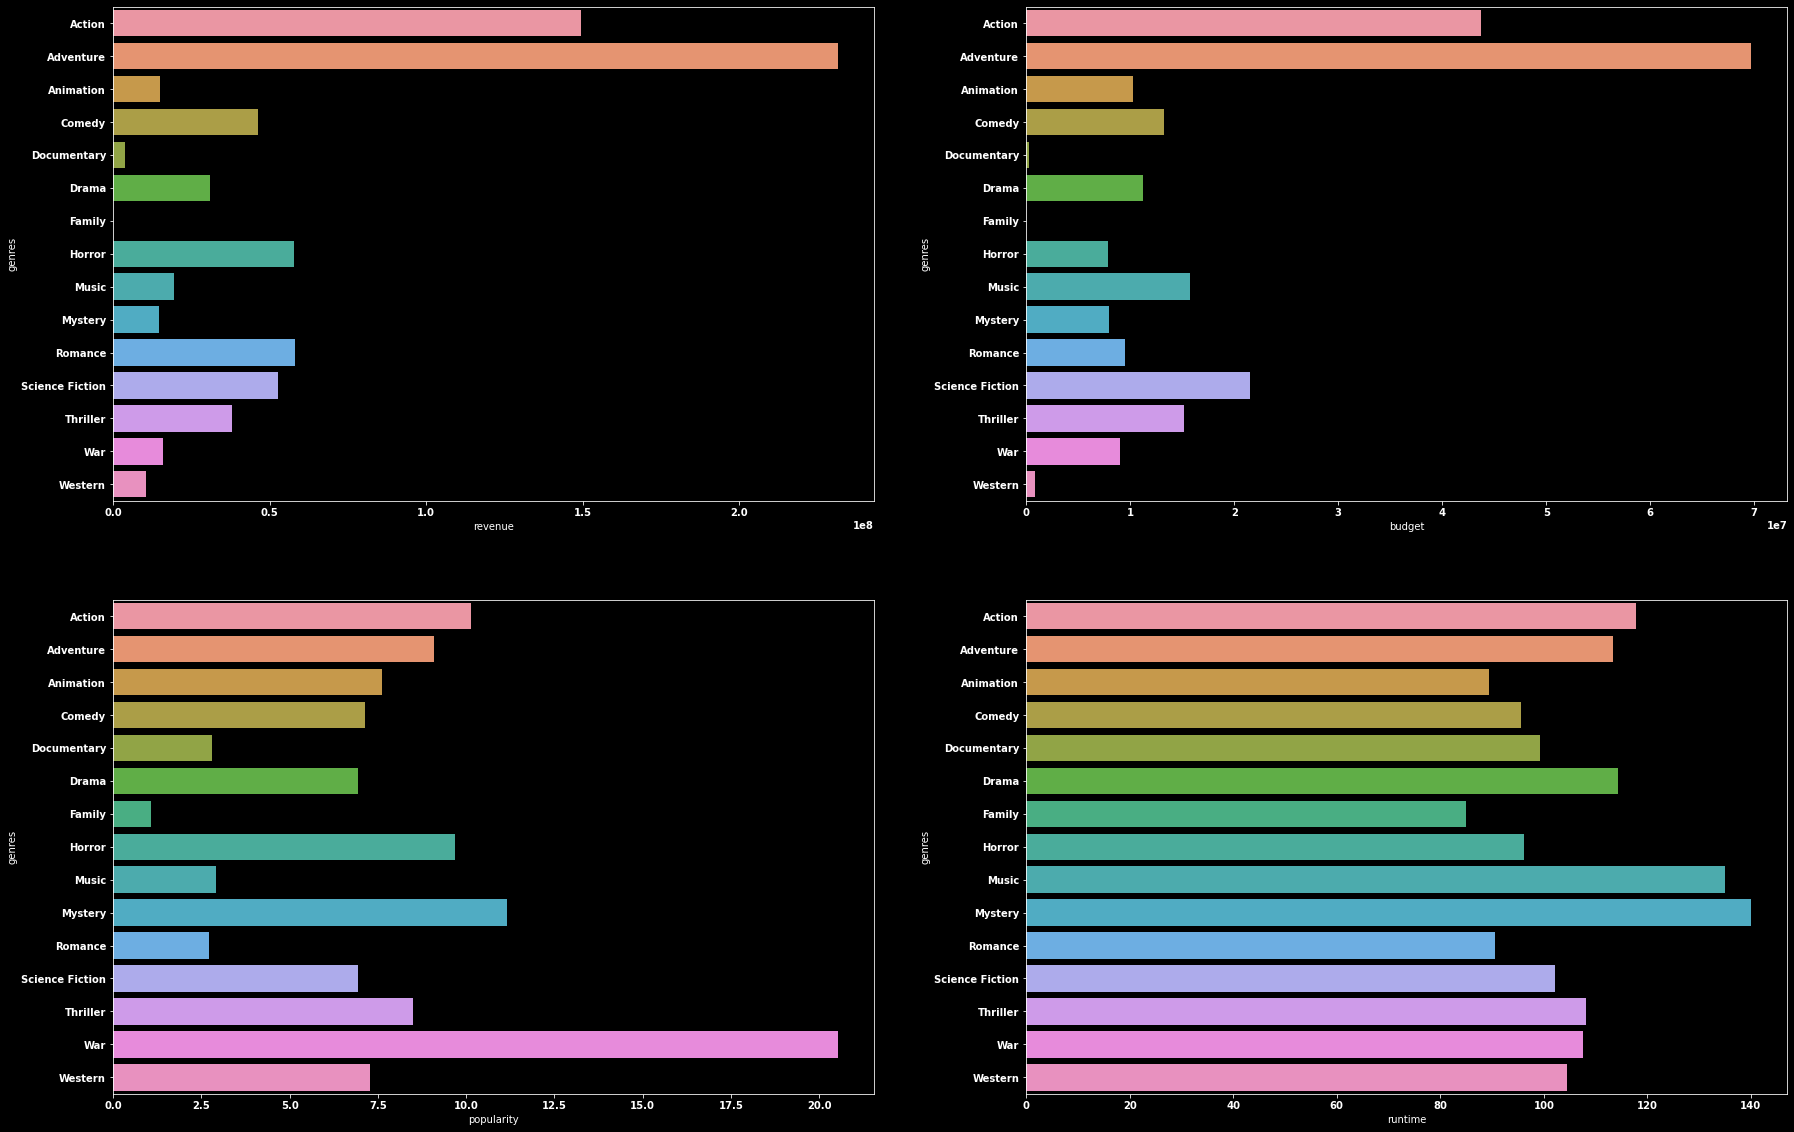

In [0]:

genres=genres.groupby(genres.genres).agg('mean')
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.barplot(genres['revenue'],genres.index)

plt.subplot(2,2,2)
sns.barplot(genres['budget'],genres.index)

plt.subplot(2,2,3)
sns.barplot(genres['popularity'],genres.index)

plt.subplot(2,2,4)
sns.barplot(genres['runtime'],genres.index)

In [0]:
crew=train['crew'].apply(lambda x:[i['name'] for i in x] if x != {} else [])
Counter([i for j in crew for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

In [0]:
cast=train['cast'].apply(lambda x:[i['name'] for i in x] if x != {} else [])
Counter([i for j in cast for i in j]).most_common(15)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

In [0]:
def prepare_data(df):
  df['_budget_runtime_ratio'] = (df['budget']/df['runtime']).replace([np.inf,-np.inf,np.nan],0)
  df['_budget_popularity_ratio'] = df['budget']/df['popularity']
  df['_budget_year_ratio'] = df['budget'].fillna(0)/(df['release_year']*df['release_year'])
  df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
  df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']
  df['budget']=np.log1p(df['budget'])

  df['collection_name']=df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
  df['has_homepage']=0
  df.loc[(pd.isnull(df['homepage'])),'has_homepage']=1

  le=LabelEncoder()
  le.fit(list(df['collection_name'].fillna('')))
  df['collection_name']=le.transform(df['collection_name'].fillna('').astype(str))

  le=LabelEncoder()
  le.fit(list(df['original_language'].fillna('')))
  df['original_language']=le.transform(df['original_language'].fillna('').astype(str))

  df['_num_Keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
  df['_num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)

  df['isbelongto_coll']=0
  df.loc[pd.isna(df['belongs_to_collection']),'isbelongto_coll']=1

  df['isTaglineNA'] = 0
  df.loc[df['tagline'] == 0 ,"isTaglineNA"] = 1 

  df['isOriginalLanguageEng'] = 0 
  df.loc[ df['original_language'].astype(str) == "en" ,"isOriginalLanguageEng"] = 1

  df['ismovie_released']=1
  df.loc[(df['status']!='Released'),'ismovie_released']=0

  df['no_spoken_languages']=df['spoken_languages'].apply(lambda x: len(x))
  df['original_title_letter_count'] = df['original_title'].str.len() 
  df['original_title_word_count'] = df['original_title'].str.split().str.len() 


  df['title_word_count'] = df['title'].str.split().str.len()
  df['overview_word_count'] = df['overview'].str.split().str.len()
  df['tagline_word_count'] = df['tagline'].str.split().str.len()


  df['collection_id'] = df['belongs_to_collection'].apply(lambda x : np.nan if len(x)==0 else x[0]['id'])
  df['production_countries_count'] = df['production_countries'].apply(lambda x : len(x))
  df['production_companies_count'] = df['production_companies'].apply(lambda x : len(x))
  df['cast_count'] = df['cast'].apply(lambda x : len(x))
  df['crew_count'] = df['crew'].apply(lambda x : len(x))

  df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
  df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
  df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

  for col in  ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
      df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
      temp = df[col].str.get_dummies(sep=',')
      df = pd.concat([df, temp], axis=1, sort=False)
  df.drop(['genres_etc'], axis = 1, inplace = True)

  cols_to_normalize=['runtime','popularity','budget','_budget_runtime_ratio','_budget_year_ratio','_budget_popularity_ratio','_releaseYear_popularity_ratio',
  '_releaseYear_popularity_ratio2','_num_Keywords','_num_cast','no_spoken_languages','original_title_letter_count','original_title_word_count',
  'title_word_count','overview_word_count','tagline_word_count','production_countries_count','production_companies_count','cast_count','crew_count',
  'genders_0_crew','genders_1_crew','genders_2_crew']
  for col in cols_to_normalize:
      print(col)
      x_array=[]
      x_array=np.array(df[col].fillna(0))
      X_norm=normalize([x_array])[0]
      df[col]=X_norm

  df = df.drop(['belongs_to_collection','genres','homepage','imdb_id','overview','id'
  ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
  ,'status','title','Keywords','cast','crew','original_language','original_title','tagline', 'collection_id'
  ],axis=1)

  df.fillna(value=0.0, inplace = True) 

  return df


In [0]:
def get_json(df):
    global dict_columns
    result=dict()
    for col in dict_columns:
        d=dict()
        rows=df[col].values
        for row in rows:
            if row is None: continue
            for i in row:
                if i['name'] not in d:
                    d[i['name']]=0
                else:
                    d[i['name']]+=1
            result[col]=d
    return result
    
    

    
train_dict=get_json(train)
test_dict=get_json(test)

In [0]:
for col in dict_columns :
    
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   
    
    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]

In [0]:
test['revenue']=np.nan
all_data=prepare_data((pd.concat([train,test]))).reset_index(drop=True)
train=all_data.loc[:train.shape[0]-1,:]
test=all_data.loc[train.shape[0]:,:]

print(train.shape)

runtime
popularity
budget
_budget_runtime_ratio
_budget_year_ratio
_budget_popularity_ratio
_releaseYear_popularity_ratio
_releaseYear_popularity_ratio2
_num_Keywords
_num_cast
no_spoken_languages
original_title_letter_count
original_title_word_count
title_word_count
overview_word_count
tagline_word_count
production_countries_count
production_companies_count
cast_count
crew_count
genders_0_crew
genders_1_crew
genders_2_crew
(3000, 173)


In [0]:
train.drop('revenue',axis=1,inplace=True)
all_data.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,budget,popularity,runtime,revenue,log_revenue,log_budget,release_day,release_month,release_year,_budget_runtime_ratio,_budget_popularity_ratio,_budget_year_ratio,_releaseYear_popularity_ratio,_releaseYear_popularity_ratio2,collection_name,has_homepage,_num_Keywords,_num_cast,isbelongto_coll,isTaglineNA,isOriginalLanguageEng,ismovie_released,no_spoken_languages,original_title_letter_count,original_title_word_count,title_word_count,overview_word_count,tagline_word_count,production_countries_count,production_companies_count,cast_count,crew_count,genders_0_crew,genders_1_crew,genders_2_crew,Action,Adventure,Animation,Comedy,Crime,...,Legendary Pictures,Lions Gate Films,Lionsgate,Metro-Goldwyn-Mayer (MGM),Millennium Films,Miramax Films,Morgan Creek Productions,New Line Cinema,New Regency Pictures,Original Film,Orion Pictures,Paramount Pictures,Participant Media,PolyGram Filmed Entertainment,Regency Enterprises,Relativity Media,Revolution Studios,Scott Free Productions,Scott Rudin Productions,Screen Gems,Silver Pictures,Spyglass Entertainment,Studio Babelsberg,StudioCanal,Summit Entertainment,TF1 Films Production,TSG Entertainment,The Weinstein Company,Touchstone Pictures,TriStar Pictures,Twentieth Century Fox Film Corporation,UK Film Council,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Wild Bunch,Working Title Films,production_companies_etc
0,0.013684,0.005148,0.009848,12314651.0,16.326300,16.454568,4,2,2015,0.004637,0.000108,0.003731,1.088886e-07,0.005133,282,1,0.004860,0.010233,0,0,0,1,0.006838,0.015051,0.018665,0.018296,0.005643,0.014926,0.007503,0.009940,0.010233,0.022525,0.026486,0.000000,0.014311,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.014557,0.006459,0.011966,95149435.0,18.370959,17.504390,4,8,2004,0.010905,0.000245,0.010778,8.632387e-08,0.006475,641,1,0.004860,0.008528,0,0,0,1,0.006838,0.027366,0.022398,0.021955,0.013426,0.017640,0.007503,0.003313,0.008528,0.002816,0.000449,0.013881,0.004403,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.012482,0.050345,0.011119,13092000.0,16.387512,15.009433,4,10,2014,0.000968,0.000003,0.000880,1.112955e-08,0.050224,1,0,0.014579,0.021746,0,0,0,1,0.006838,0.005473,0.003733,0.003659,0.004086,0.013569,0.007503,0.009940,0.021746,0.020023,0.021997,0.013881,0.012109,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.011641,0.002486,0.012919,16000000.0,16.588099,13.997833,4,3,2012,0.000303,0.000019,0.000321,2.251759e-07,0.002482,1,0,0.008504,0.002985,0,0,0,1,0.013676,0.004789,0.003733,0.003659,0.020626,0.000000,0.007503,0.000000,0.002985,0.000939,0.001347,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.000899,0.012495,3923970.0,15.182615,0.000000,3,2,2009,0.000000,0.000000,0.000000,6.217854e-07,0.000899,1,1,0.000000,0.001706,0,0,0,1,0.006838,0.002737,0.003733,0.007318,0.006227,0.000000,0.007503,0.000000,0.001706,0.000626,0.000898,0.000000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y=train['log_revenue']
X=train.drop(['log_revenue'],axis=1)

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
kfold=KFold(n_splits=3,random_state=42,shuffle=True)

In [0]:
print(X.columns)
print(y)

Index(['budget', 'popularity', 'runtime', 'log_budget', 'release_day',
       'release_month', 'release_year', '_budget_runtime_ratio',
       '_budget_popularity_ratio', '_budget_year_ratio',
       ...
       'Twentieth Century Fox Film Corporation', 'UK Film Council',
       'United Artists', 'Universal Pictures', 'Village Roadshow Pictures',
       'Walt Disney Pictures', 'Warner Bros.', 'Wild Bunch',
       'Working Title Films', 'production_companies_etc'],
      dtype='object', length=171)
0       16.326300
1       18.370959
2       16.387512
3       16.588099
4       15.182615
          ...    
2995    14.283442
2996    12.103990
2997    18.309266
2998    18.962792
2999    18.223292
Name: log_revenue, Length: 3000, dtype: float64


# All metrics used to measure success of an algorithm

In [0]:
def show_metrics(y_test, y_pred):
  print("Mean Squared Log Error = " + str(metrics.mean_squared_log_error(y_test, y_pred)))
  print("Root Mean Squared Log Error = " + str(np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))))
  print("Mean Squared Error = " + str(metrics.mean_squared_error(y_test, y_pred)))
  print("Root Mean Squared Error = " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
  print("R^2 = " + str(metrics.r2_score(y_test, y_pred)))

# Artificial neural network

In [0]:
from keras import optimizers
    
model=models.Sequential()
model.add(layers.Dense(356,activation='relu', kernel_regularizer=regularizers.l1(.001), input_shape=(X.shape[1],)))
model.add(layers.Dense(356,activation='relu', kernel_regularizer=regularizers.l1(.001), input_shape=(X.shape[1],)))
model.add(layers.Dense(256,kernel_regularizer=regularizers.l1(.001),activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=optimizers.rmsprop(lr=.001),loss='mse',metrics=['mean_squared_logarithmic_error'])

epochs=100
hist=model.fit(X_train,y_train,epochs=epochs,verbose=0)
test_pred = model.predict(X_test)

show_metrics(y_test, test_pred)

Mean Squared Log Error = 0.04802700972923916
Root Mean Squared Log Error = 0.2191506553246856
Mean Squared Error = 6.340809283227409
Root Mean Squared Error = 2.518096360989271
R^2 = 0.3646456450670478


# Light Gradient Boosting Machine

In [0]:
def msle(y_true, y_pred):
    return 'MSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

model_lgb = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)

model_lgb.fit(X_train, y_train, 
        verbose=1000)


prediction_lgb_test=model_lgb.predict(X_test)

show_metrics(y_test, prediction_lgb_test)

# Random Forest

In [0]:
rf_base = RandomForestRegressor(random_state=42)
rf_base.fit(X_train, y_train)
y_rf_base_pred = rf_base.predict(X_test)
print("Base Random Forest Regressor:\n")
show_metrics(y_test, y_rf_base_pred)


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print("\nTuned Random Forest Regressor:\n")
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 75, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)




Base Random Forest Regressor:

Mean Squared Log Error = 0.039297616959656466
Root Mean Squared Log Error = 0.19823626550068094
Mean Squared Error = 4.724818192658192
Root Mean Squared Error = 2.1736646918644538
R^2 = 0.5265692940942913

Tuned Random Forest Regressor:

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: ignored

In [0]:
y_rf_pred = rf_random.predict(X_test)
show_metrics(y_test, y_rf_pred)
print("\nWith the following parameters:")
print(rf_random.best_params_)

# XGBoost

In [0]:
def xgb_model(X_train, y_train, X_test, y_test) :  
  params = {'objective': 'reg:linear', 
    'eta': 0.01, 
    'max_depth': 6, 
    'subsample': 0.6, 
    'colsample_bytree': 0.7,  
    'eval_metric': 'rmse', 
    'seed': 2020, 
    'silent': True,
  }
  
  record = dict()

  train_data = xgb.DMatrix(data=X_train, label=y_train)

  model = xgb.train(dtrain=train_data, num_boost_round=20000, params=params)

  test_pred = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)

  show_metrics(y_test, test_pred)

xgb_model(X_train, y_train, X_test, y_test)


In [0]:
xgb_model(X_train, y_train, X_test, y_test)

# CatBoost Regressor

In [0]:
from catboost import CatBoostRegressor

def cat_model(X_train, y_train, X_test, y_test) :    
  model = CatBoostRegressor(iterations=10000,
  learning_rate=0.004,
  depth=5,
  colsample_bylevel=0.8,
  random_seed = 2020,
  bagging_temperature = 0.2,
  metric_period = None,
  )

  model.fit(X_train, y_train,
    verbose=False)
  
  test_pred = model.predict(X_test)

  show_metrics(y_test, test_pred)

cat_model(X_train, y_train, X_test, y_test)

# Elastic-Net

In [0]:
elastic_net_model = ElasticNet(random_state=42)
elastic_net_model.fit(X_train, y_train)
y_elastic_pred = elastic_net_model.predict(X_test)
show_metrics(y_test, y_elastic_pred)

TypeError: ignored

In [0]:
elastic_net_model.get_params()

In [0]:
elastic_netCV_model = ElasticNetCV(cv=5, random_state=42)
elastic_netCV_model.fit(X_train, y_train)
y_elastic_CV_pred = elastic_netCV_model.predict(X_test)
show_metrics(y_test, y_elastic_CV_pred)

# Ridged Regression


In [0]:
ridged_model = Ridge(random_state=42)
ridged_model.fit(X_train, y_train)
y_ridge_pred = ridged_model.predict(X_test)
show_metrics(y_test, y_ridge_pred)

In [0]:
ridgeCV_model = RidgeCV(alphas=[0.0005, 0.001, 0.00125, 0.0015, 0.00175, 0.002])
ridgeCV_model.fit(X_train, y_train)
y_ridgeCV_pred = ridgeCV_model.predict(X_test)
show_metrics(y_test, y_ridgeCV_pred)
print("Optimal alpha: " + str(ridgeCV_model.alpha_))

In [0]:
#linear kernel
kernel_ridge_model = KernelRidge(alpha=ridgeCV_model.alpha_)
kernel_ridge_model.fit(X_train, y_train)
y_kernel_ridge_pred = kernel_ridge_model.predict(X_test)
show_metrics(y_test, y_kernel_ridge_pred)

# Linear Regression

In [0]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_lm_pred = lm.predict(X_test)
show_metrics(y_test, y_lm_pred)

# Polynomial Regression

In [0]:
# poly_features = PolynomialFeatures(degree=2)
# x_poly_train = poly_features.fit_transform(X_train)
# x_poly_test = poly_features.fit_transform(X_test)
# poly_model = LinearRegression()
# poly_model.fit(x_poly_train, y_train)
# y_poly_pred = poly_model.predict(x_poly_test)
# show_metrics(y_test, y_poly_pred)

# Support Vector Regression

In [0]:
from sklearn.svm import SVR

Cval = 100
eps= 1

SVRreg = SVR(C=Cval, epsilon=eps)
SVRreg.fit(X_train,y_train)
y_pred = SVRreg.predict(X_test)
show_metrics(y_test, y_pred)

##Hyper-parameters Fine-Tuning Approaches 

#### Cross Validating Params

Note: I cross-validated kernel as well with two possible values; rbf and linear. CV with linear kernel took a long time (+4h), mainly because training with linear kernal is very time consuming. I removed it from here in case the code is re-run. But its results are logged. When all features are used, RBF Kernel is better.

In [0]:
# Cross validation
from sklearn.model_selection import GridSearchCV
params_selection = {
    "C": np.linspace(10, 200, 10),
    "epsilon": np.linspace(.02, 6, 10),
}

clf = GridSearchCV(SVR(), params_selection, verbose=5)
res = clf.fit(X_train, y_train)
# cv_results = cross_validate(SVR(), X_train, y_train, cv=5, fit_params=params_selection, scoring='neg_mean_squared_error', return_estimator=True)

In [0]:
res.cv_results_

#### Testing with The Best Selected Modal through Grid Search Cross Validation

In [0]:
 Best Model Test Results
print("Best Selected Model with params {}".format(res.best_params_))
best_model = res.best_estimator_
y_pred = best_model.predict(X_test)
show_metrics(y_test, y_pred)

#### Top 20 Correlated Features

##### Selecting Top 20 Correlated Features

In [0]:
# Select top 20 featues and train and test on that
cor = train.corr(method ='pearson')
cor_target = abs(cor["log_revenue"])
relevant_features = cor_target[cor_target>0.19]
features_names = [f for f in relevant_features.index.values if f != 'log_revenue']
print(features_names)
print(len(features_names))

minimized_X_train = X_train[features_names]
minimized_X_test = X_test[features_names]

##### Training with Top 20 Correlated Features using RBF Kernel

In [0]:
# when using kernel=rbf
print("Training with Top 20 Correlated Features using RBF Kernel")
SVRreg = SVR(C=200, epsilon=1.67)
SVRreg.fit(minimized_X_train,y_train)
y_pred = SVRreg.predict(minimized_X_test)
show_metrics(y_test, y_pred)

##### Training with Top 20 Correlated Features using Linear Kernel

In [0]:
print("Training with Top 20 Correlated Features using Linear Kernel")
SVRreg = SVR(C=Cval, epsilon=eps, kernel='linear')
SVRreg.fit(minimized_X_train,y_train)
y_pred = SVRreg.predict(minimized_X_test)
show_metrics(y_test, y_pred)

#### Applying PCA

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)
pca.explained_variance_ratio_

##### Training with 20-component PCA Features using RBF Kernel

In [0]:
print("Training with 20-component PCA Features using RBF Kernel")
SVRreg = SVR(C=Cval, epsilon=eps)
SVRreg.fit(pca_X_train,y_train)
y_pred = SVRreg.predict(pca_X_test)
show_metrics(y_test, y_pred)

##### Training with 20-component PCA Features using Linear Kernel

In [0]:
print("Training with 20-component PCA Features using Linear Kernel")
SVRreg = SVR(C=Cval, epsilon=eps, kernel='linear')
SVRreg.fit(pca_X_train,y_train)
y_pred = SVRreg.predict(pca_X_test)
show_metrics(y_test, y_pred)